Integrantes
*   Jose Fuentes Yañez
*   Julisa Figueroa Rivas
*   Christian  Diaz Reyes

# importar y procesar datos

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv('Walmart.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
#se transforma la variable store categorias booleanas representadas por 0 y1

one_hot = pd.get_dummies(data['Store'],prefix='Store')

X = data.drop(columns=['Weekly_Sales','Store','Date'], axis=1)
X = pd.concat([one_hot,X], axis=1)
y = data['Weekly_Sales']

In [4]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
X.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,0,42.31,2.572,211.096358,8.106
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,1,38.51,2.548,211.242170,8.106
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,0,39.93,2.514,211.289143,8.106
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,0,46.63,2.561,211.319643,8.106
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,0,46.50,2.625,211.350143,8.106


# Redes neuronales

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo de red neuronal
model = Sequential()

# Agregar capas a totalmente conectadas de 64,32 y 1 neurona
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  
model.add(Dense(32, activation='relu'))  
model.add(Dense(1))  


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train_scaled, y_train, epochs=120, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss = model.evaluate(X_test_scaled, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")

# Hacer predicciones
predicciones = model.predict(X_test_scaled)


Epoch 1/120


c:\Users\José Fuentes\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1341962321920.0000 - val_loss: 1442340405248.0000
Epoch 2/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1411491299328.0000 - val_loss: 1441724497920.0000
Epoch 3/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1416786214912.0000 - val_loss: 1439840862208.0000
Epoch 4/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1381127159808.0000 - val_loss: 1435998748672.0000
Epoch 5/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1329589387264.0000 - val_loss: 1429667577856.0000
Epoch 6/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1373891461120.0000 - val_loss: 1420324765696.0000
Epoch 7/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1374300143616.0000 - val_loss: 1407637520384.0000
Epoch 8/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1367862149120.0000 - val_loss: 1391310536704.0000
Epoch 9/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1349505253376.0000 - val_loss: 1370981793792.0000
Epoch 10/120

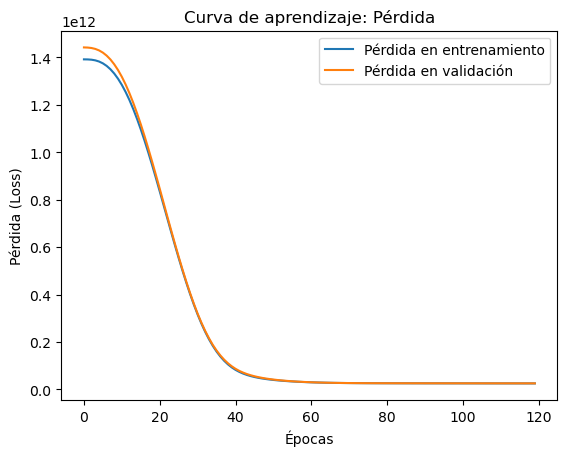

In [52]:
import matplotlib.pyplot as plt

# Graficar la pérdida en entrenamiento
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Curva de aprendizaje: Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

# calcular r2,rmse y mse para ver el rendimiento
r2 = r2_score(y_test, predicciones)
rmse = np.sqrt(mean_squared_error(y_test, predicciones))
mse = mean_squared_error(y_test, predicciones)


print(f"R2: {r2}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

R2: 0.9135403737246037
RMSE: 166261.62287304533
MSE: 27642927240.37875


# Regresion Lineal

In [54]:
from sklearn.linear_model import LinearRegression


linear = LinearRegression()
linear.fit(X_train_scaled, y_train)


y_pred_linear = model.predict(X_test_scaled)

# Evaluar el modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))


print("RMSE:", rmse_linear)
print("MSE:", mse_linear)
print("R²:", r2_linear)


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE: 166261.62287304533
MSE: 27642927240.37875
R²: 0.9135403737246037


# KNN
Tecnica seleccionada debido a que tiene los mejores resultados

In [5]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
# Optimización de hiperparámetros para el valor de k en KNN
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Obtener el mejor valor de k
best_k = grid_search.best_params_['n_neighbors']
print(f"Mejor valor de k: {best_k}")

Mejor valor de k: 17


grafico del mejor K

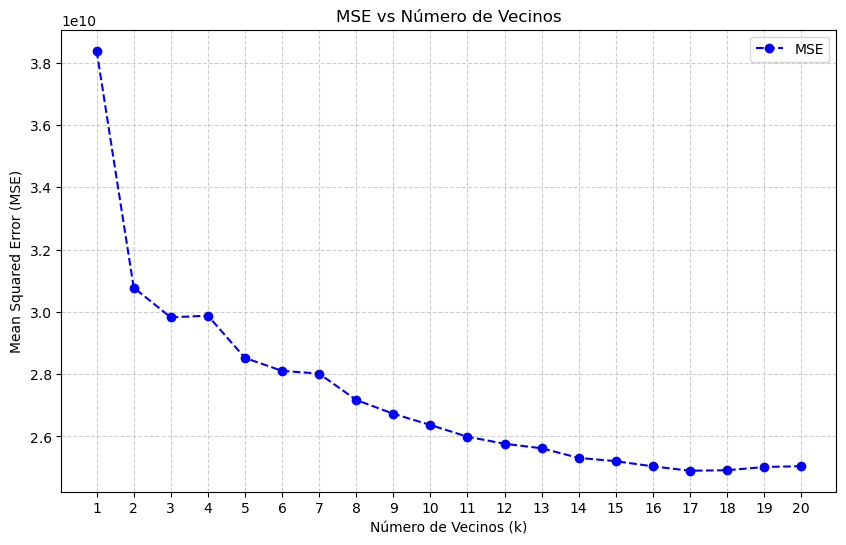

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

results = grid_search.cv_results_

# Extraer valores de n_neighbors y los errores negativos (que se convierten a positivos)
k_values = param_grid['n_neighbors']  # Rango de k utilizado
mse_scores = -results['mean_test_score']  # Negativo para convertir a MSE positivo

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='--', color='b', label='MSE')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Número de Vecinos')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


Crear un modelo KNN con el mejor valor de k

In [58]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

y_pred_knn= knn.predict(X_test_scaled)

In [59]:
# Evaluar el rendimiento del modelo r2,rmse y mse
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Mostrar los resultados
print(f"R2: {r2_knn}")
print(f"RMSE: {rmse_knn}")
print(f"MSE: {mse_knn}")

R2: 0.9206182261154644
RMSE: 159310.99060739967
MSE: 25379991728.31098


Grafico de KNN usando la tecnica de PCA

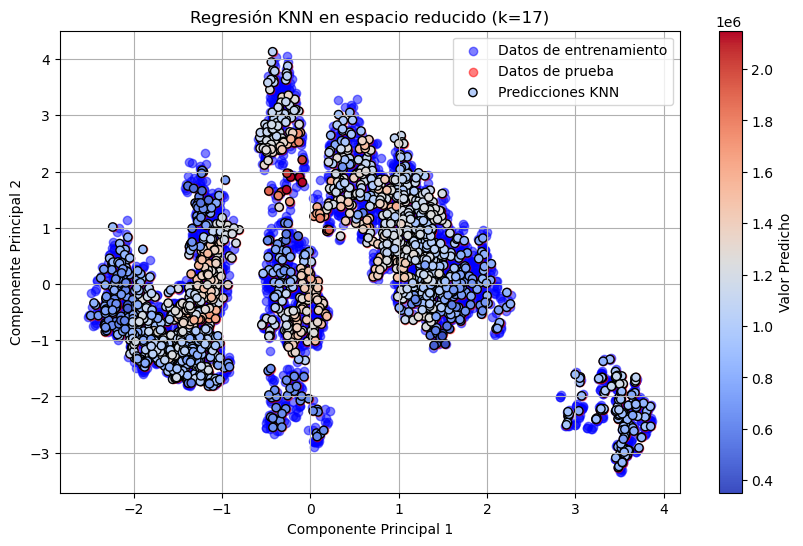

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduccion de dimensiones usando PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_pca, y_train)


y_pred_knn = knn.predict(X_test_pca)


plt.figure(figsize=(10, 6))

# Graficar los datos de entrenamiento
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], color='blue', label='Datos de entrenamiento', alpha=0.5)

# Graficar las predicciones de KNN
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], color='red', label='Datos de prueba', alpha=0.5)

# Graficar las predicciones de KNN (como puntos)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_knn, cmap='coolwarm', marker='o', edgecolors='k', label='Predicciones KNN')

# Personalización del gráfico
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Regresión KNN en espacio reducido (k={best_k})')
plt.legend()
plt.colorbar(label='Valor Predicho')  # Añadir barra de color para predicciones
plt.grid(True)
plt.show()


validacion de KNN usando validacion cruzada

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer


# Creacion de metricas
scoring = {
    'rmse': make_scorer(mean_squared_error, squared=False),
    'mse': make_scorer(mean_squared_error),
    'r2': 'r2'
}

knn = KNeighborsRegressor(n_neighbors=17)

# Validacion cruzada usando 5 particiones
scores = cross_validate(knn, X_train_scaled, y_train, cv=5, scoring=scoring)

print("Cross-validation results:")
print(f"RMSE: {scores['test_rmse']}")
print(f"RMSE: {scores['test_rmse'].mean()}")
print(f"MSE: {scores['test_mse']}")
print(f"MSE: {scores['test_mse'].mean()}")
print(f"R2: {scores['test_r2']}")
print(f"R2: {scores['test_r2'].mean()}")

c:\Users\José Fuentes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\José Fuentes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\José Fuentes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\José Fuentes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root 

Cross-validation results:
RMSE: [149462.82421067 162071.8929797  153376.84468849 168728.24271825
 154608.33636353]
RMSE: 157649.62819212856
MSE: [2.23391358e+10 2.62672985e+10 2.35244565e+10 2.84692199e+10
 2.39037377e+10]
MSE: 24900769673.107635
R2: [0.92607948 0.9167004  0.92363938 0.91585271 0.92632433]
R2: 0.9217192624768865


c:\Users\José Fuentes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


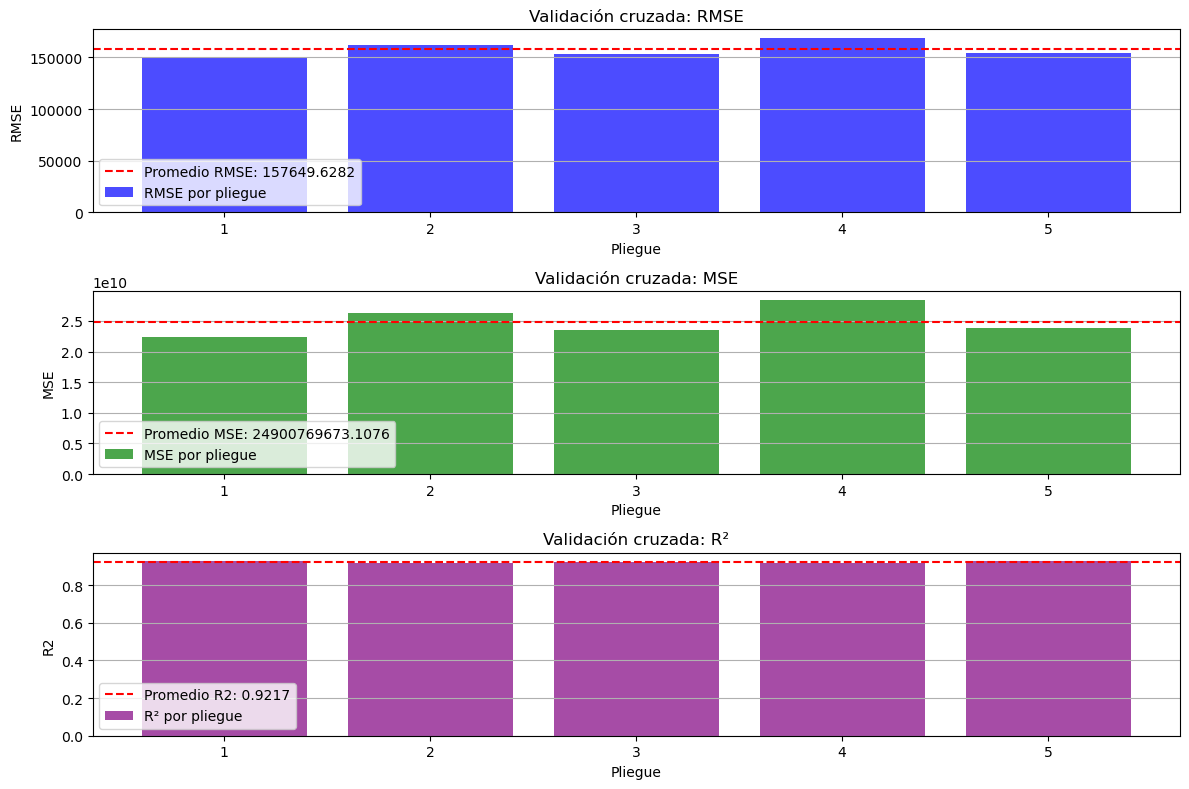

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados obtenidos de la validación cruzada
rmse_scores = scores['test_rmse']
mse_scores = scores['test_mse']
r2_scores = scores['test_r2']

# Número de pliegues
folds = np.arange(1, len(rmse_scores) + 1)

# Crear las figuras para cada métrica
plt.figure(figsize=(12, 8))

# Gráfico para RMSE
plt.subplot(3, 1, 1)
plt.bar(folds, rmse_scores, color='b', alpha=0.7, label='RMSE por pliegue')
plt.axhline(y=rmse_scores.mean(), color='r', linestyle='--', label=f'Promedio RMSE: {rmse_scores.mean():.4f}')
plt.title("Validación cruzada: RMSE")
plt.xlabel("Pliegue")
plt.ylabel("RMSE")
plt.xticks(folds)
plt.legend()
plt.grid(axis='y')

# Gráfico para MSE
plt.subplot(3, 1, 2)
plt.bar(folds, mse_scores, color='g', alpha=0.7, label='MSE por pliegue')
plt.axhline(y=mse_scores.mean(), color='r', linestyle='--', label=f'Promedio MSE: {mse_scores.mean():.4f}')
plt.title("Validación cruzada: MSE")
plt.xlabel("Pliegue")
plt.ylabel("MSE")
plt.xticks(folds)
plt.legend()
plt.grid(axis='y')

# Gráfico para R²
plt.subplot(3, 1, 3)
plt.bar(folds, r2_scores, color='purple', alpha=0.7, label='R² por pliegue')
plt.axhline(y=r2_scores.mean(), color='r', linestyle='--', label=f'Promedio R2: {r2_scores.mean():.4f}')
plt.title("Validación cruzada: R²")
plt.xlabel("Pliegue")
plt.ylabel("R2")
plt.xticks(folds)
plt.legend()
plt.grid(axis='y')

# Ajustar espaciado entre los subgráficos
plt.tight_layout()
plt.show()
